<a href="https://colab.research.google.com/github/yoonju977/Digital-Image-Processing/blob/main/Lab07_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from PIL import Image

In [23]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
lap=np.array([[0,1,0],[1,-4,1],[0,1,0]])

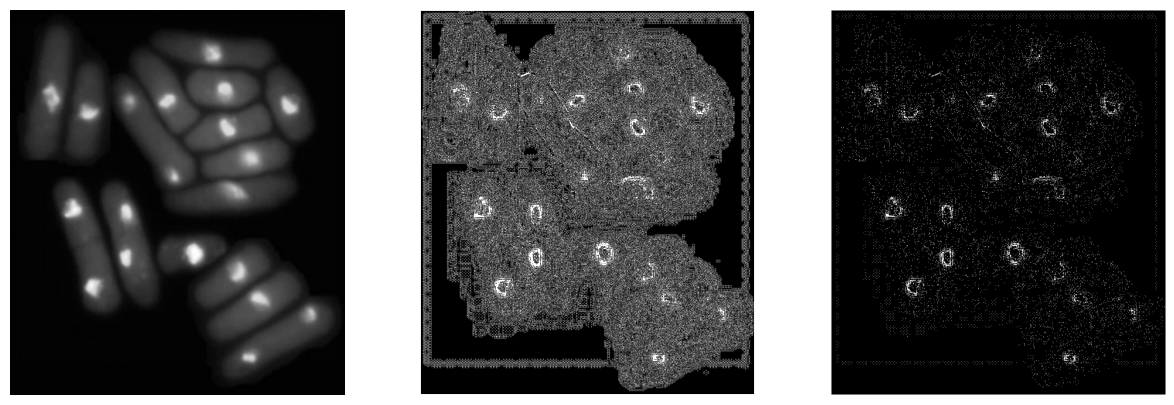

In [25]:
I = Image.open(imgpath+'/yeast-cells.tif')
f = np.array(I)
f_lap = signal.convolve2d(f,lap,'same')
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.abs(f_lap),cmap='gray',vmin=0,vmax=4)
plt.axis('off')
plt.subplot(133)
plt.imshow(np.abs(f_lap)>=4,cmap='gray')
plt.axis('off')
plt.show()

## Basic Global Thresholding

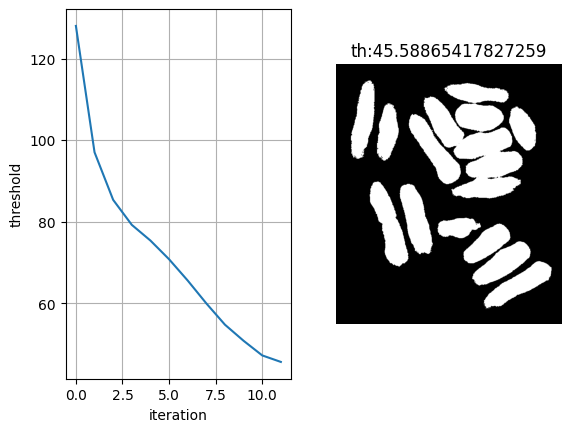

In [26]:
T_init = 128
T = []
T.append(T_init)
dT = 1000
esp = 2
## write down your algorithm
while dT>esp:
  m1 = np.mean(f[f<=T[-1]])
  m2 = np.mean(f[f>T[-1]])
  T.append(0.5*(m1+m2))
  dT = np.abs(T[-1]-T[-2])

bmsk = f>T[-1]
plt.subplot(122)
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.subplot(121)
plt.plot(np.arange(len(T)),T)
plt.xlabel('iteration')
plt.ylabel('threshold')
plt.grid('on')
plt.show()

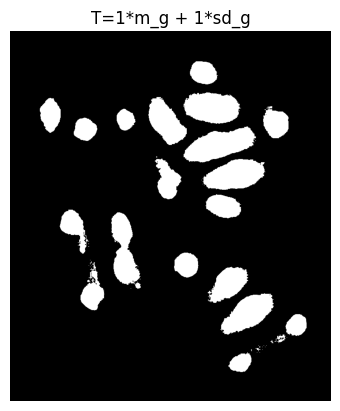

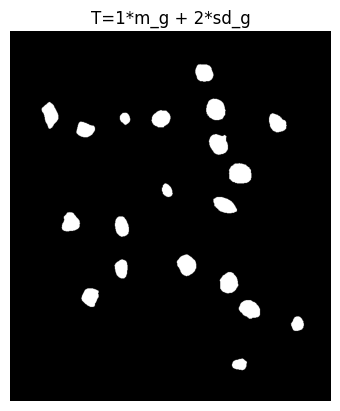

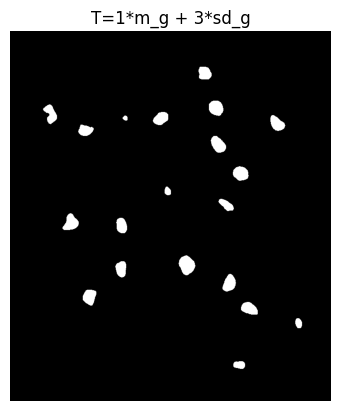

In [27]:
a=1
b_vals=[1,2,3]
for b in b_vals:
  m_g = np.mean(f)
  sd_g = np.std(f)
  T = a*m_g+b*sd_g
  plt.imshow(f>T,cmap='gray')
  plt.axis('off')
  plt.title(f'T={a}*m_g + {b}*sd_g')
  plt.show()

## Using Edges to Improve Global Thresholding

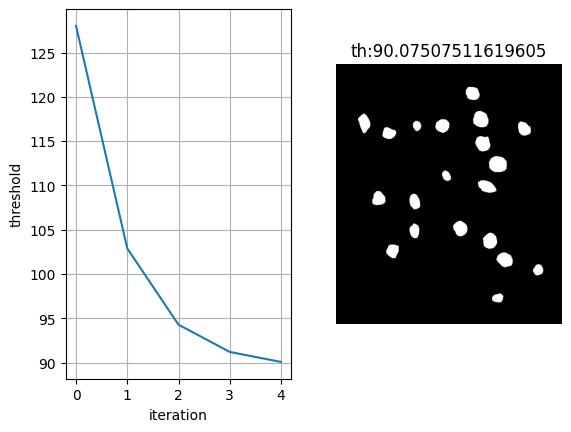

In [28]:
T_init = 128
T = []
T.append(T_init)
dT = 1000
esp = 2
f_msk = f[np.abs(f_lap)>=4]
## write down your algorithm
while dT>esp:
  m1 = np.mean(f_msk[f_msk<=T[-1]])
  m2 = np.mean(f_msk[f_msk>T[-1]])
  T.append(0.5*(m1+m2))
  dT = np.abs(T[-1]-T[-2])

bmsk = f>T[-1]
plt.subplot(122)
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.subplot(121)
plt.plot(np.arange(len(T)),T)
plt.xlabel('iteration')
plt.ylabel('threshold')
plt.grid('on')
plt.show()

## K-means clustering

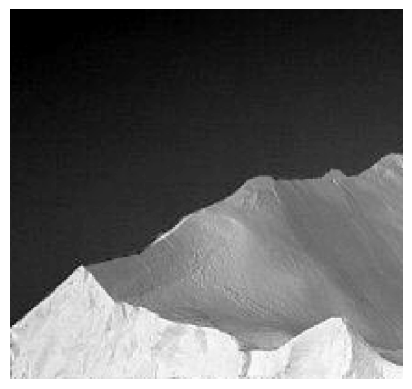

In [29]:
I = Image.open(imgpath+'/iceberg.tif')
#f = np.array(I)
f = np.array(I).astype(np.int16)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

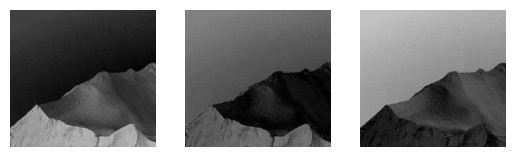

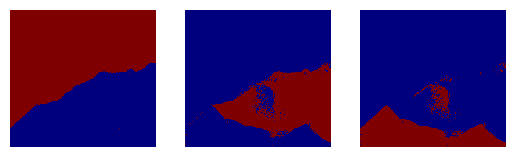

In [30]:
m_vals = [64, 128, 192]
c = np.zeros((f.shape[0],f.shape[1],len(m_vals)))

for i in range(len(m_vals)):
  c[:,:,i] = np.abs(f-m_vals[i])

# distance maps
plt.subplot(131)
plt.imshow(c[:,:,0],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(c[:,:,1],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(c[:,:,2],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

# k-means clustering (1st iteration)
cmap = np.argmin(c,axis=-1)
plt.subplot(131)
plt.imshow(cmap==0,interpolation='nearest',cmap='jet')
plt.axis('off')
plt.subplot(132)
plt.imshow(cmap==1,interpolation='nearest',cmap='jet')
plt.axis('off')
plt.subplot(133)
plt.imshow(cmap==2,interpolation='nearest',cmap='jet')
plt.axis('off')
plt.show()

## Exercise
- 강의노트의 "standard" k-means clustering algorithm을 완성하여 iceberg.tif 및 s01.nii.gz 파일에 적용해보자.
- k=2,3,4 일 때의 결과를 iceberg.tif, s01.nii.gz에 대해 각각 비교해보자.

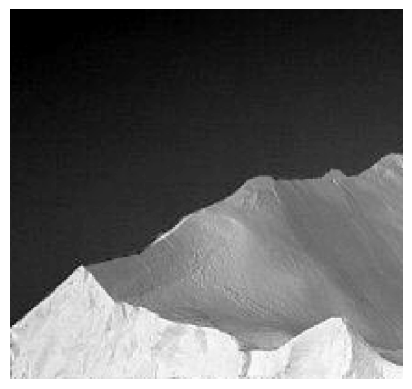

In [40]:
I = Image.open(imgpath+'/iceberg.tif')
f = np.array(I)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

Final cluster centers for k = 2: [ 28.88822637 164.7358476 ]


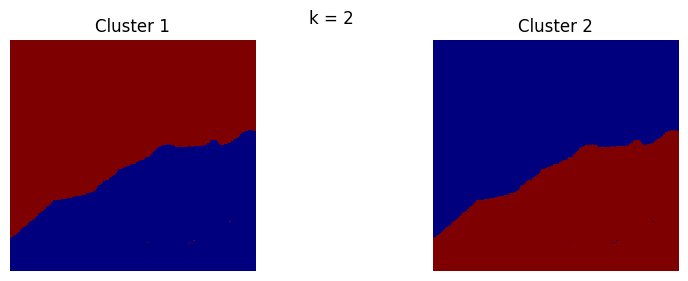

Final cluster centers for k = 3: [ 28.74370715 131.95402687 221.96702829]


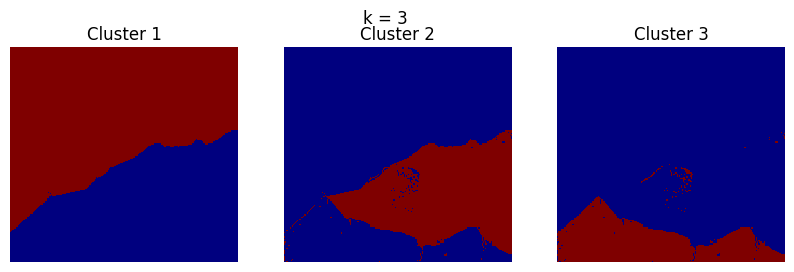

Final cluster centers for k = 4: [ 28.69700521 121.14624318 154.46654329 223.92952998]


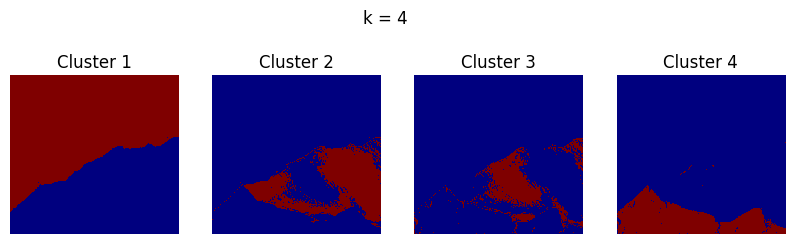

In [41]:
m_vals_list = [
    np.array([64., 192.]),  # k=2
    np.array([64., 128., 192.]),  # k=3
    np.array([64., 96., 160., 192.])  # k=4
]
#k값 비교를 위한 루프
for m_vals in m_vals_list:
    c = np.zeros((f.shape[0], f.shape[1], len(m_vals)))
    cmap = np.zeros_like(f)
    m_vals_new = np.zeros(m_vals.shape)
    E = 10000
    eps = 1

    # K-means clustering algorithm
    """
    각 픽셀과 모든 클러스터 중심값 간의 절대걸리 계산후 가장 가까운 클러스터를 할당,
    새로운 클러스터 중심값을 계산하고 픽셀이 존재하면 mean 계산, 존재하지 않으면 기존값 유지
    이전중심과 새로운 중심 간의 편차 계산, 편차가 eps보다 작으면 종료
    """
    while E > eps:
        for i, m in enumerate(m_vals):
            c[:, :, i] = np.abs(f - m)


        cmap = np.argmin(c, axis=-1)


        for i in range(len(m_vals)):
            if np.any(cmap == i):
                m_vals_new[i] = np.mean(f[cmap == i])
            else:
                m_vals_new[i] = m_vals[i]


        E = np.sum(np.abs(m_vals - m_vals_new))
        m_vals = m_vals_new.copy()

    print(f"Final cluster centers for k = {len(m_vals)}: {m_vals}")

#결과를 시각화
    plt.figure(figsize=(10, 3))
    for i in range(len(m_vals)):
        plt.subplot(1, len(m_vals), i + 1)
        plt.imshow(cmap == i, cmap='jet', interpolation='nearest')
        plt.axis('off')
        plt.title(f'Cluster {i+1}')
    plt.suptitle(f'k = {len(m_vals)}')
    plt.show()

In [42]:
!pip install nibabel

In [43]:
import nibabel as nib

In [44]:
h = nib.load('/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/s01.nii')

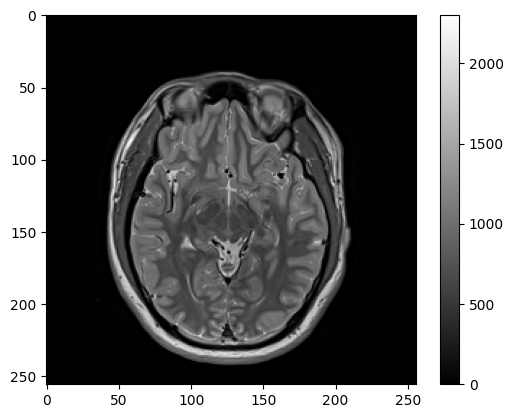

In [52]:
mri = h.get_fdata()
f = mri[::-1,::-1,9].transpose((1,0))
plt.imshow(f,cmap='gray')
plt.colorbar()
plt.show()

Final cluster centers for k = 2: [ 21.10721049 873.50525754]


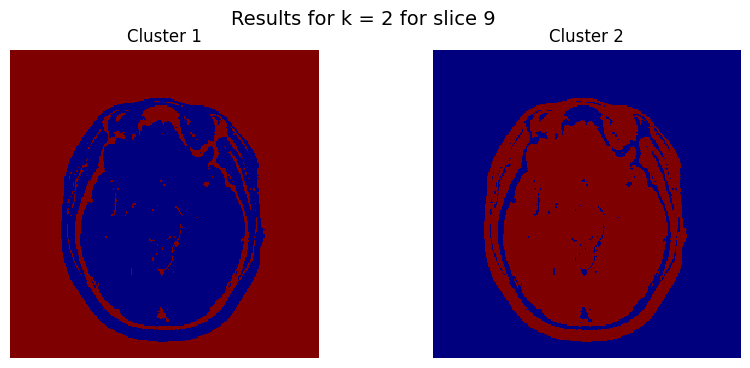

Final cluster centers for k = 3: [  13.6064965   683.68692198 1170.16880673]


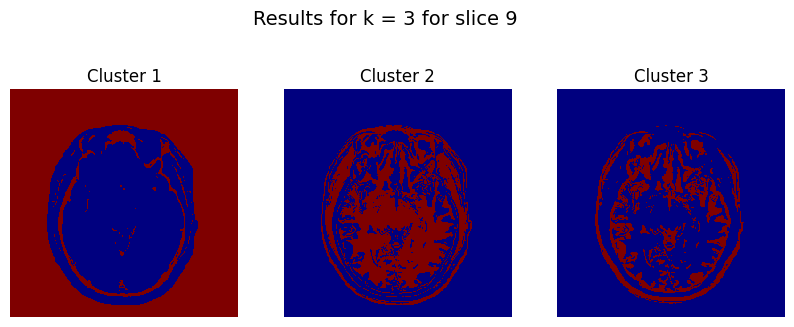

Final cluster centers for k = 4: [  11.79251015  615.20540051  974.54024979 1549.1518371 ]


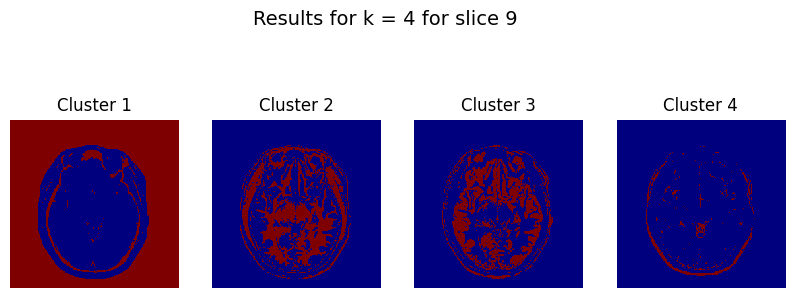

In [54]:
m_vals_list = [
    np.array([64., 192.]),  # k=2
    np.array([64., 128., 256.]),  # k=3
    np.array([64., 96., 160., 256.])  # k=4
]

# Loop through each m_vals to apply k-means clustering
for m_vals in m_vals_list:
    c = np.zeros((f.shape[0], f.shape[1], len(m_vals)))
    cmap = np.zeros_like(f, dtype=np.int32)
    m_vals_new = np.zeros(m_vals.shape)
    E = 10000
    eps = 1

    # K-means clustering algorithm
    """
    각 픽셀과 모든 클러스터 중심값 간의 절대걸리 계산후 가장 가까운 클러스터를 할당,
    새로운 클러스터 중심값을 계산하고 픽셀이 존재하면 mean 계산, 존재하지 않으면 기존값 유지
    이전중심과 새로운 중심 간의 편차 계산, 편차가 eps보다 작으면 종료
    """
    while E > eps:

        for i, m in enumerate(m_vals):
            c[:, :, i] = np.abs(f - m)


        cmap = np.argmin(c, axis=-1)


        for i in range(len(m_vals)):
            if np.any(cmap == i):
                m_vals_new[i] = np.mean(f[cmap == i])
            else:
                m_vals_new[i] = m_vals[i]

        E = np.sum(np.abs(m_vals - m_vals_new))
        m_vals = m_vals_new.copy()

    print(f"Final cluster centers for k = {len(m_vals)}: {m_vals}")

#결과를 시각화
    plt.figure(figsize=(10, 4))
    for i in range(len(m_vals)):
        plt.subplot(1, len(m_vals), i + 1)
        plt.imshow(cmap == i, cmap='jet', interpolation='nearest')
        plt.axis('off')
        plt.title(f'Cluster {i+1}')
    plt.suptitle(f'Results for k = {len(m_vals)} for slice 9', fontsize=14)
    plt.show()